<a href="https://colab.research.google.com/github/amfakh/LSTM-Movie-Review/blob/master/File%20Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read all the Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [ ]:
import pandas as pd
import glob

In [ ]:
path = 'MCU_all' 
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
print(all_files)

['MCU_all/7.csv', 'MCU_all/8.csv', 'MCU_all/3.csv', 'MCU_all/1.csv', 'MCU_all/2.csv', 'MCU_all/5.csv', 'MCU_all/11.csv', 'MCU_all/6.csv', 'MCU_all/10.csv', 'MCU_all/4.csv', 'MCU_all/9.csv']


In [ ]:
df.head()

,rating,title,review
0,10/10,Unlike anything ever done in the history of ci...,This movie is the beginning of the culmination...
1,10/10,This movie will blow your mind and break your ...,"Over the past decade, Marvel has earned itself..."
2,10/10,Way better than endgame,This film is way better than endgame!\nThe act...
3,10/10,A Summer Film That IS Even Better Than The Hype,Summer movies often hype themselves as spectac...
4,9/10,Excellent Film,I was amazed to see so many negative reviews; ...


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df['number'] = df['rating'].map(lambda x: str(x)[:-3])
df['number'].replace("", '0', inplace=True)
df['number'] = df['number'].astype(int)

score = df['number'].value_counts()
score = score.sort_index()

In [ ]:
print(score)

0      533
1     2722
2     1050
3     1066
4     1123
5     1538
6     1836
7     2475
8     3210
9     3070
10    7046
Name: number, dtype: int64


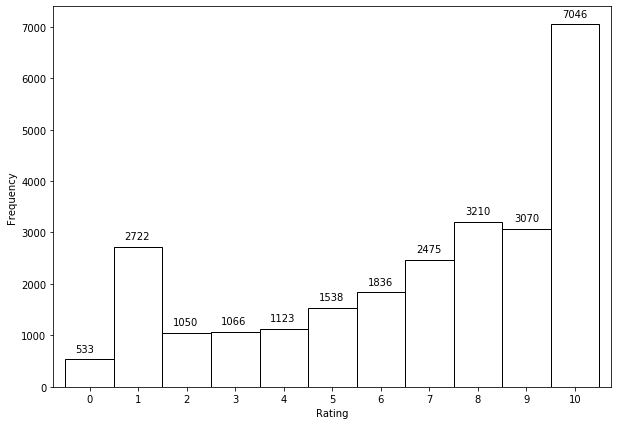

In [ ]:
plt.figure(figsize=(10,7))
ax = score.plot(kind='bar', color='w', linewidth=1, edgecolor='black', width=1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005 + 0.2, p.get_height() + 150))

plt.xlabel("Rating")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

plt.show()

In [ ]:
  df.shape

(25669, 4)

In [ ]:
text_len1 = [len(r) for r in df['review']]
length1 = pd.DataFrame(data=text_len1)
print("average length: %0.1f" % np.mean(text_len1))
print("max length: %d" % max(text_len1))

average length: 931.2
max length: 9992


In [ ]:
length1.describe()

,0
count,25669.000000
mean,931.174491
std,1149.164174
min,26.000000
25%,215.000000
50%,505.000000
75%,1160.000000
max,9992.000000


# Lemmatize & Tokenize

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stop = stopwords.words("english")
common = {'avengers', 'avengers', 'infinity', 'war'
          ,'movies', 'movie', 'endgame', 'marvel', 'ant', 'man'
          , 'plot', 'film', 'review', 'reviews'
          ,'mcu', 'superhero', 'captain', 'one', 'see'
          ,'action', 'really', 'imdb', 'studio',
          'many', 'people'
          }
# huge = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]
stop.extend(common)
# stop.extend(huge)
sword = set(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(common)
print(stop)
print(sword)

{'man', 'marvel', 'war', 'people', 'film', 'mcu', 'reviews', 'really', 'many', 'endgame', 'avengers', 'movies', 'ant', 'see', 'one', 'movie', 'studio', 'action', 'plot', 'captain', 'superhero', 'infinity', 'review', 'imdb'}
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'unde

In [ ]:
# def nltk_tag_to_wordnet_tag(nltk_tag):
#     if nltk_tag.startswith('J'):
#         return wordnet.ADJ
#     elif nltk_tag.startswith('V'):
#         return wordnet.VERB
#     elif nltk_tag.startswith('N'):
#         return wordnet.NOUN
#     elif nltk_tag.startswith('R'):
#         return wordnet.ADV
#     else:          
#         return None

In [ ]:
df['cleaned'] = df['review'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize \
        (re.sub(r'([^\s\w]|_)+|\s\s+|\n|^\d|\d+',' ', str(x))) \
            if word.lower() not in sword\
            ]))

# Regex explanation:
# [^\s\w|_]+
# Detect anything other than whitespace and character (in this case punctuation)
# \s\s+
# Detect double space
# \r
# Detect new lines
# \d
# Detect number
# \d+
# Detect multiple number

In [ ]:
df.head()

,rating,title,review,number,cleaned
0,10/10,Unlike anything ever done in the history of ci...,This movie is the beginning of the culmination...,10,beginning culmination masterfully woven cinema...
1,10/10,This movie will blow your mind and break your ...,"Over the past decade, Marvel has earned itself...",10,past decade earned benefit doubt consistently ...
2,10/10,Way better than endgame,This film is way better than endgame!\nThe act...,10,way better action better writing better dialog...
3,10/10,A Summer Film That IS Even Better Than The Hype,Summer movies often hype themselves as spectac...,10,summer often hype spectacular event missed ad ...
4,9/10,Excellent Film,I was amazed to see so many negative reviews; ...,9,amazed negative impossible please hour long co...


In [ ]:
text_len2 = [len(r) for r in df['cleaned']]
length2 = pd.DataFrame(data=text_len2)
print("average length: %0.1f" % np.mean(text_len2))
print("max length: %d" % max(text_len2))

average length: 518.0
max length: 6775


In [ ]:
length2.describe()

,0
count,25669.000000
mean,517.967120
std,665.445324
min,0.000000
25%,112.000000
50%,271.000000
75%,632.000000
max,6775.000000


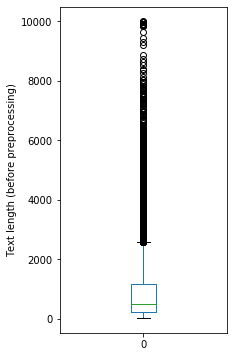

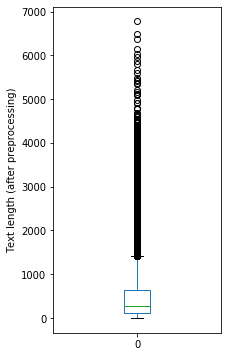

In [ ]:
length1.plot(kind='box', figsize=(3, 6))
plt.ylabel('Text length (before preprocessing)')

length2.plot(kind='box', figsize=(3, 6))
plt.ylabel('Text length (after preprocessing)')

plt.show()

In [ ]:
# df['cleaned'].head()

In [ ]:
# df['cleaned'] = df['review'].apply(\
# lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
#     for word in word_tokenize(re.sub(r'([^\s\w]|_)+|\s\s+|\n', ' ', str(x)))]))

# Remove Null Object

In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]

nans = nans(df)

In [ ]:
import numpy as np

df['number'].replace(0, np.nan, inplace=True)
df.dropna(subset=['number'], inplace=True)
df['number'] = df['number'].astype(float)

In [ ]:
df.shape

(25136, 5)

In [ ]:
df['sentiment'] = df['number'].apply(lambda x : 0 if x<=5 else 1)
df['sentiment'].value_counts()

1    17637
0     7499
Name: sentiment, dtype: int64

In [ ]:
nans.head()

,rating,title,review,number,cleaned
69,NaN,A tedious and dependent film,SPOILER: The plot is simple that the supervill...,0,spoiler simple supervillian succeeds russo bro...
126,NaN,Thanos the Emo Crybaby...Thanos Mickey Mouse S...,12 jokes within 3 minutes in conversation betw...,0,joke within minute conversation doctor strange...
139,NaN,A snore -- literally,This film was complete and utter tosh. Judging...,0,complete utter tosh judging way positively rev...
146,NaN,"Thanos and Bubbles, Kiddie Mickey Mouse Style",I don't recognize the THANOS The MAD TITAN fro...,0,recognize thanos mad titan comic book thanos w...
176,NaN,"Good movie, but completely ruined",Spoilers!!!Spoilers: the movie was pretty good...,0,spoiler spoiler pretty good bit quippy good en...


In [ ]:
nans.shape

(533, 5)

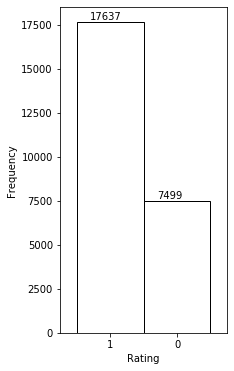

In [ ]:
plt.figure(figsize=(3,6))
ax = df['sentiment'].value_counts().plot(kind='bar', color='w', linewidth=1, edgecolor='black', width=1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005 + 0.2, p.get_height() + 150))

plt.xlabel("Rating")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

plt.show()

# Data Visualization

In [ ]:
df.to_csv('df.csv')

nans.to_csv('nan.csv')

In [ ]:
import random


def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 0.0 / 255.0)
    s = int(100.0 * 0.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
positive = df[df['sentiment']==1]['cleaned']
negative = df[df['sentiment']==0]['cleaned']

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# nltk.download('stopwords')
# stop = stopwords.words("english")
# common = {'avengers', 'avengers', 'infinity', 'war'
#           ,'movie', 'endgame', 'marvel', 'ant', 'man'
#           ,'great', 'good', 'plot', 'film', 'review'
#           ,'mcu', 'superhero', 'captain', 'one', 'see'
#           ,'action', 'really', 'imdb', 'better', 'studio'
#           }
# stop.extend(common)
# stopwords = set(stop)
stopwords = set(STOPWORDS)

<Figure size 432x288 with 0 Axes>

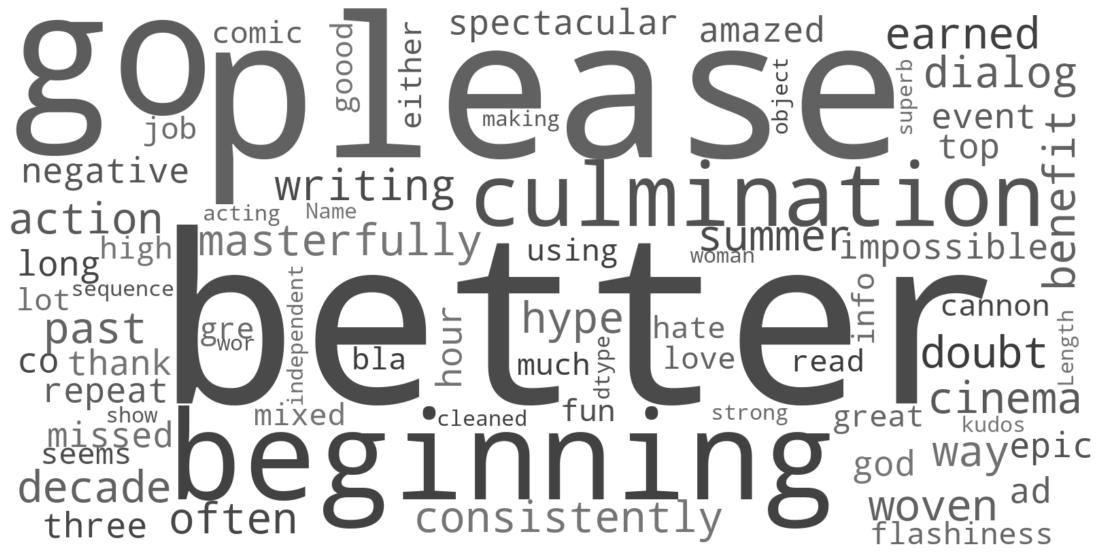

In [ ]:
wordcloud = WordCloud(
                          width=1600, height=800,
                          background_color='white',
                          # stopwords=stopwords,
                          # max_words=800,
                          collocations=False,
                          # max_font_size=40 
                          # random_state=20
                         ).generate(str(positive))

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")

<Figure size 432x288 with 0 Axes>

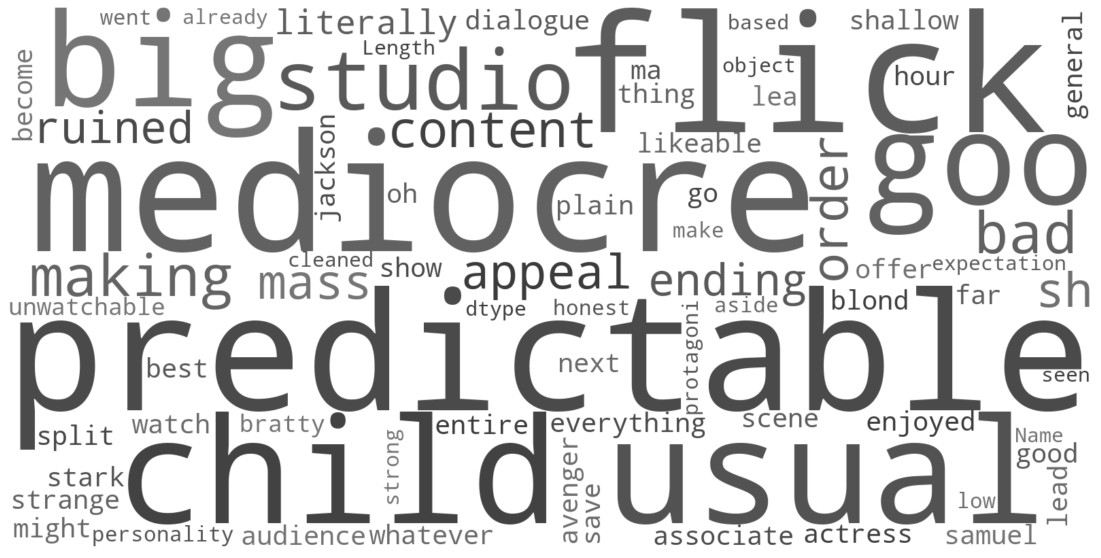

In [ ]:
wordcloud = WordCloud(
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          # max_words=200,
                          collocations=False,
                          # max_font_size=40, 
                          # random_state=42
                         ).generate(str(negative))

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")

<Figure size 432x288 with 0 Axes>

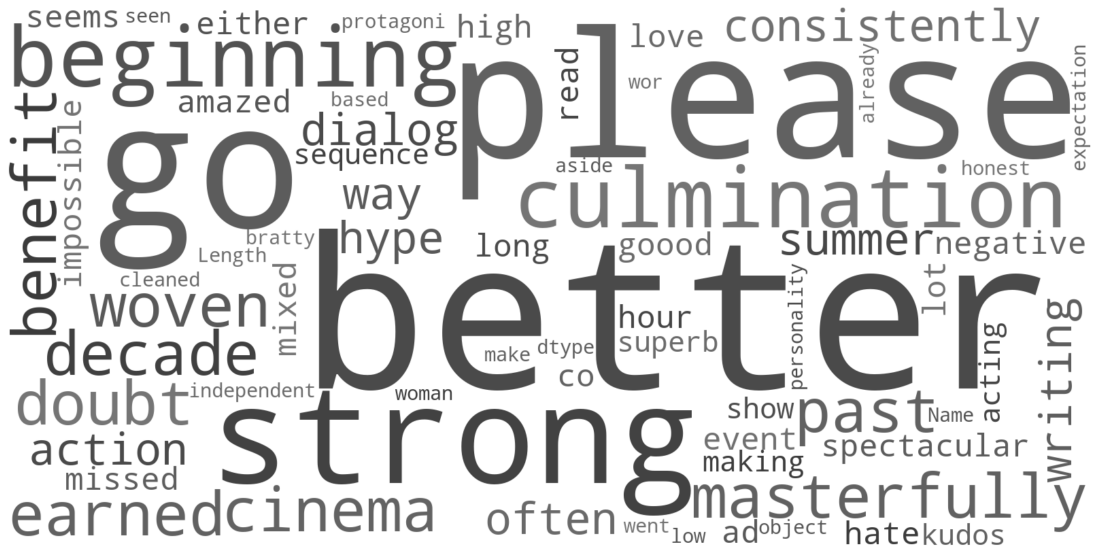

In [ ]:
wordcloud = WordCloud(
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          collocations=False,
                         ).generate(str(df['cleaned']))

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")

In [ ]:
df['review_len'] = negative.apply(len)
df['cleaned_len'] = df['review'].astype(str).apply(len)

Text(0.5, 1.0, 'Review Text Length Distribution')

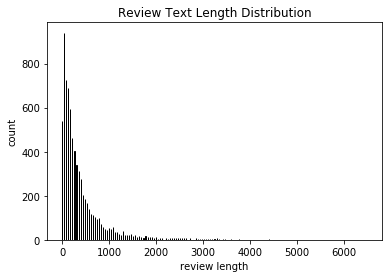

In [ ]:
df['review_len'].plot(kind='hist', color='w', linewidth=1, edgecolor='black', width=1, bins=150)

plt.xlabel("review length")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.title("Review Text Length Distribution")

Text(0, 0.5, 'count')

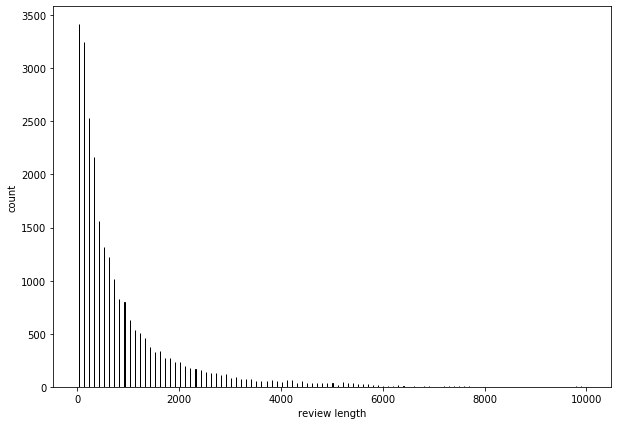

In [ ]:
plt.figure(figsize=(10,7))

df['cleaned_len'].plot(kind='hist', color='w', linewidth=1, edgecolor='black', width=1, bins=100)

plt.xlabel("review length")
plt.xticks(rotation=0)
plt.ylabel("count")
# plt.title("Review Text Length Distribution")

In [ ]:
df['word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'count')

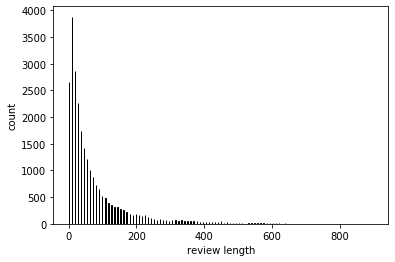

In [ ]:
df['word_count'].plot(kind='hist', color='w', linewidth=1, edgecolor='black', width=1, bins=100)

plt.xlabel("review length")
plt.xticks(rotation=0)
plt.ylabel("count")

In [ ]:
print(df['review'][63]+"\n\n")
print(df['cleaned'][4])


In the end this movie proved to be an absolute slugfest that never stops. The action is nonstop and there is neither any buildup or climax to the action. This could have been redeemed if the actors had any time to do their jobs but they were never given any time to perform and so the characters are rather disconnected from their surroundings and their reactions ridiculous. The only character that is given time to evolve in this movie is Thanos, and he is an interesting figure and I fully approve of how they chose to adapt his motivations instead of following the comic books. But one character is not enough and as usual there is nothing on the line which is hardly surprising since they need to milk every cent they can out of the franchise, and I do not in any way blame them for this. But when the movie ends and not a single character have been killed except for heimdal I really can't bother with their cash grabbing ways any longer. For the people who actually believes that half the char

In [ ]:
df[['review', 'cleaned', 'rating', 'sentiment']].head(33)

,review,cleaned,rating,sentiment
0,This movie is the beginning of the culmination...,beginning culmination masterfully woven cinema...,10/10,1
1,"Over the past decade, Marvel has earned itself...",past decade earned benefit doubt consistently ...,10/10,1
2,This film is way better than endgame!\nThe act...,way better action better writing better dialog...,10/10,1
3,Summer movies often hype themselves as spectac...,summer often hype spectacular event missed ad ...,10/10,1
4,I was amazed to see so many negative reviews; ...,amazed negative impossible please hour long co...,9/10,1
5,All the reviews that say this movie has no plo...,say either troll idiot take time watch previou...,10/10,1
6,"I absolutely loved this movie. It was intense,...",absolutely loved intense packed emotional also...,10/10,1
7,"I went and looked, and I want to express my th...",went looked want express thought went high exp...,9/10,1
8,"Engrossing, Epic, Emotional. Those are the thr...",engrossing epic emotional three e define lates...,10/10,1
9,"Well, Well, Well....I was so ready to tear thi...",well well well ready tear th star bloated cgi ...,9/10,1


In [ ]:
df['cleaned'][31]

'two half hour reversed first minute fun fight scene garbage yes know allegedly building something matter still big let least deadpool month away'